# A practical, if not simple flowchart for using git

Before you get started: you should have [git - the simple guide](http://rogerdudler.github.io/git-guide/) at hand in another tab. I find is useful, but newbs often don't know when to do what actions. That's what I'm focusing on. *git - the simple guide* discussed the *what* better. Heck, maybe mine is too complicated. I know it missed a lot for more advanced users, but this gives a student an idea of what to do when. 

The flow below presumes that you are sharing a remote repository (have the rights to push changes to it- maybe only with yourself!), or will have to submit a pull request directly to a cloned remote repository. 

Your first step going to be something of the form

````git clone username@host:/path/to/repository````

## Forking and branching: 

### Forking someone else's project
*However*, you may find it much more convenient to fork a primary repository (someone else's) and work with that one until your code is all settled. In that case, you will normally act using pushes to your remotely stored fork, and occasionally, submit a pull request from your fork to the primary repository. Even in that case, you need to take steps to ensure your remote repository is staying up to date with the primary repository. GitHub makes that part easy.  You submit a pull request in reverse (swap the bases- make the arrow point to yours). 

I haven't shown forking and merging below because it's messy enough. Below is the "day to day" usage. 

### Branching your own project
Sometimes you just want to try something experimental, it may work, it may not, but you'll want to not mess up the main repository until it's all done (whatever *messing up* means). 

I make forks for "I have an idea" using 

`git checkout -b bad_idea`

then often delete them after using something like

`git branch -d bad_idea`

where `bad_idea` was my branch. However, it it works well, use 

`git checkout master` (to switch to the master branch)

`git merge bad_idea` (to pull in the bad_idea changes)

to bring the changes in the branch `bad_idea` back into the master branch. You can always use

`git diff master bad_idea` 

to compare branches before merging. 

### Staging 
I've neglected `staging`, which is like `mini-commits` and make a lot of sense if you've touched (edited) a lot of files, but only want one or a few to be retained, or you want to be able to make different comments for different file changes in the commits. You can then push all of your commits and undo all of your "sloppy editing" of other files with a reset (below). 

## Daily workflow
The flowchart below gives you an idea of your regular activities and the appropriate commands. If you are using an application, it explains `commits` versus `pushes`



![title](GitFlow.gv.svg)

Why is the code at the end? So that this is a) maintainable, b) readible!

In [ ]:
from graphviz import Source, render, 

In [27]:
src = Source(
    """digraph {
    Aa [label = "Any chance the main repository\n has been updated?"]
    Ab [label = "git pull"]
    A [label = "Edit and test your code.\n Do your edits work?"]
    B [label = "Did you make a new file?"] ;
    Ba [label = "git add 'filename'\n Want to store this\n version locally?"]
    Bb [label = "git commit -m 'Commit message'\n Ready for others to see?"]
    Bc [label = "git pull\n Any conflicts?"]
    Bd [label = "Edit files to deconflict, retest.
        git commit -m 'Commit message'"]
    C [label = "git push origin master\nor git request-pull\n Done editing?"]
    Ca [label = "Was that a big mistake?"]
    Cb [label = "Really bad?"]
    D [label = "Let's restore the previous version.\ngit checkout -- 'filename'"]
    Db [label = "Let's go back to the main repository\ngit fetch origin
        git reset --hard origin/master
        Or to your last commit
        git reset --hard '###'
        where '###' comes from
        git log"]
    A->B [label = "Yes"]
    B->Ba [label = "Yes"]
    B->Bb [label = "No"]
    Aa->A [label = "No"]
    Aa->Ab [label = "Yes"]
    Ab->A 
    A->A [label = "No"]
    Ba->Bb [label = "Yes"]
    Ba->A [label = "No"]
    Bb->Bc [label = "Yes"]
    Bc->Bd [label = "Yes"]
    Bb->Aa [label = "No"]
    Bd->C
    Bc->C [label ="No"]
    #B:ne->A:se [label = "No"]
    C->Aa [label = "No"]
    C->Ca [label = "Yes"]
    Ca->Cb [label = "Yes"]
    Cb->Db [label = "Yes"]
    Cb->D [label = "No"]
    Ca->Aa[label = "No"]
    D->Aa 
    Db->Aa
    #E->Aa [label = "No"]
}
        """,
    filename='GitFlow.gv')

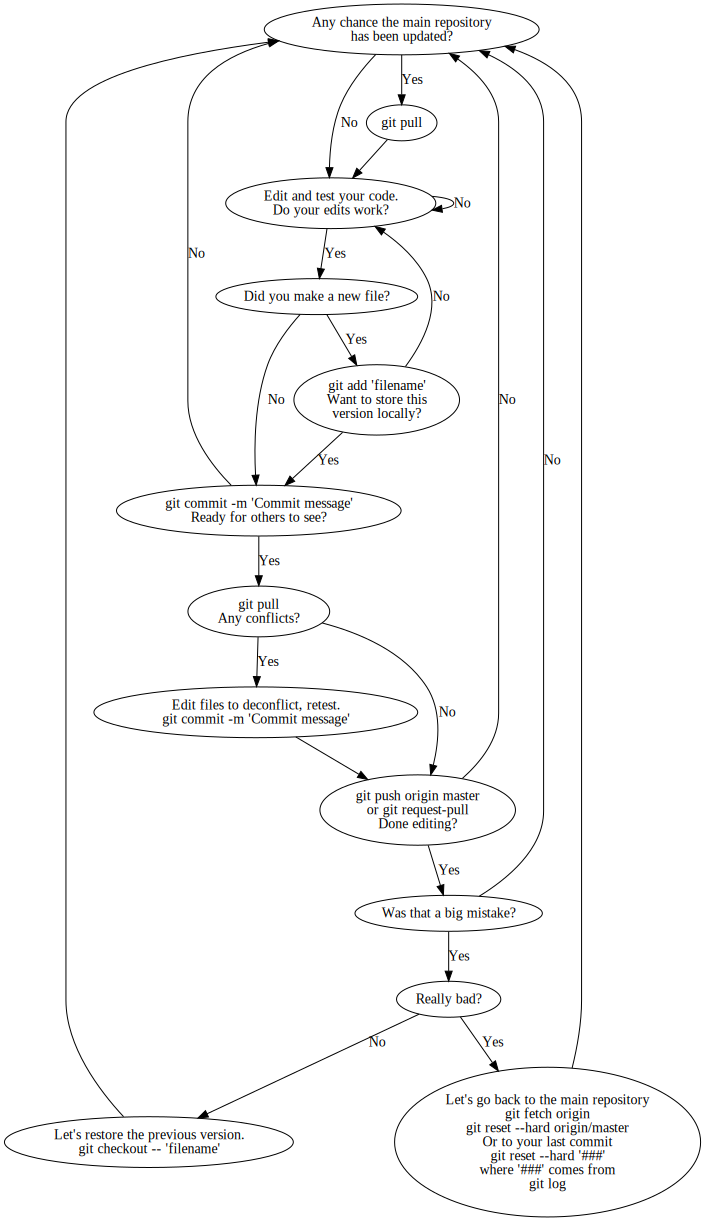

In [28]:
src.from_file('GitFlow.gv')